In [1]:
from large_gcs.contact.contact_location import *
from large_gcs.contact.contact_pair_mode import *
from large_gcs.contact.rigid_body import *
from large_gcs.geometry.polyhedron import Polyhedron
from large_gcs.graph.contact_graph import ContactGraph
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# np.set_printoptions(formatter={"float": lambda x: "{0:0.3f}".format(x)})

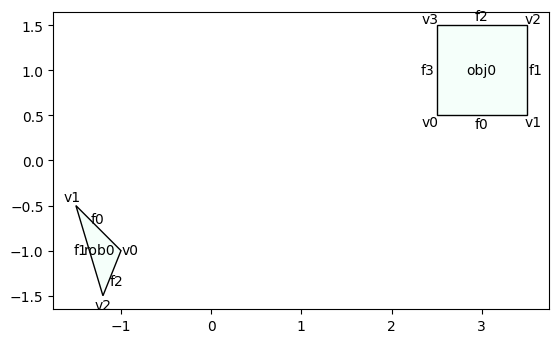

In [2]:
# # 2 items
# obs_vertices = [
#     np.array([[0, 0], [1, 0], [0, -1]])
# ]
# obj_vertices = [
# ]
# rob_vertices = [
#     np.array([[-1,-1],[-1.5,-0.5],[-1.2, -1.5]])
# ]
# source_obj_pos = []
# source_rob_pos = [[-1, -1]]
# target_obj_pos = []
# target_rob_pos = [[2, 2]]


# # 2 movable items
obs_vertices = []
obj_vertices = [np.array([[0, 0], [1, 0], [1, 1], [0, 1]]) + np.array([2.5, 0.5])]
rob_vertices = [np.array([[-1, -1], [-1.5, -0.5], [-1.2, -1.5]])]
source_obj_pos = [[1, 1]]
source_rob_pos = [[-1, -1]]
target_obj_pos = [[3, 1]]
target_rob_pos = [[4, 3]]

# 3 items
# obs_vertices = [
#     np.array([[0, 0], [1, 0], [0, -1]])
# ]
# obj_vertices = [
#     np.array([[0, 0], [1, 0], [1, 1], [0,1]]) + np.array([2.5,0.5])
# ]
# rob_vertices = [
#     np.array([[-1,-1],[-1.5,-0.5],[-1.2, -1.5]])
# ]

# # 3 boxes
# obs_vertices = [
#     np.array([[0, 0], [2, 0], [2, 1], [0,1]])
# ]
# obj_vertices = [
#     np.array([[0, 0], [1, 0], [1, 1], [0,1]]) + np.array([2.5,0.5])
# ]
# rob_vertices = [
#     np.array([[0, 0], [0.5, 0], [0.5, 0.5], [0,0.5]]) + np.array([0,-1])
# ]

# # 4 items
# obs_vertices = [
#     np.array([[0, 0], [1, 0], [0, -1]])
# ]
# obj_vertices = [
#     np.array([[0, 0], [1, 0], [1, -0.5]]) + np.array([1.5, 0]),
#     np.array([[0, 0], [1, 0], [1, 1], [0,1]]) + np.array([2.5,0.5])
# ]
# rob_vertices = [
#     np.array([[-1,-1],[-1.5,-0.5],[-1.2, -1.5]])
# ]
obs = []
objs = []
robs = []
n_pos_per_set = 2
for i in range(len(obs_vertices)):
    obs.append(
        RigidBody(
            name=f"obs{i}",
            geometry=Polyhedron.from_vertices(obs_vertices[i]),
            mobility_type=MobilityType.STATIC,
            n_pos_points=n_pos_per_set,
        )
    )
for i in range(len(obj_vertices)):
    objs.append(
        RigidBody(
            name=f"obj{i}",
            geometry=Polyhedron.from_vertices(obj_vertices[i]),
            mobility_type=MobilityType.UNACTUATED,
            n_pos_points=n_pos_per_set,
        )
    )
for i in range(len(rob_vertices)):
    robs.append(
        RigidBody(
            name=f"rob{i}",
            geometry=Polyhedron.from_vertices(rob_vertices[i]),
            mobility_type=MobilityType.ACTUATED,
            n_pos_points=n_pos_per_set,
        )
    )
all_rigid_bodies = obs + objs + robs

for rigid_body in all_rigid_bodies:
    rigid_body.plot()

In [3]:
ws = 3
contact_graph = ContactGraph(
    obs,
    objs,
    robs,
    source_obj_pos,
    source_rob_pos,
    target_obj_pos,
    target_rob_pos,
    workspace=[[-ws, ws], [-ws, ws]],
)

print(contact_graph.params)

Generating contact sets for 2 bodies...
Generating contact pair modes for 1 body pairs...


100%|██████████| 1/1 [00:00<00:00, 41.79it/s]


Each body pair has on average 11.0 modes
Generating contact sets for 11 sets...


100%|██████████| 11/11 [00:00<00:00, 105.64it/s]


Constructing polyhedron for set ('IC|obj0_f0-rob0_v1',)
((-0.99998453282472777 + obj0_pos(1, 0) - rob0_pos(1, 0)) == 0)
((-0.99998453282472777 + obj0_pos(1, 1) - rob0_pos(1, 1)) == 0)
((0.76666955379346446 + obj0_pos(0, 0) - rob0_pos(0, 0)) >= 0)
((0.76666955379346446 + obj0_pos(0, 0) - rob0_pos(0, 0)) <= 1.0000000000000115)
((0.76666955379346446 + obj0_pos(0, 1) - rob0_pos(0, 1)) >= 0)
((0.76666955379346446 + obj0_pos(0, 1) - rob0_pos(0, 1)) <= 1.0000000000000115)
(obj0_force_res(0) == ( - obj0_pos(0, 0) + obj0_pos(0, 1)))
(obj0_force_res(1) == ( - obj0_pos(1, 0) + obj0_pos(1, 1)))
(rob0_force_res(0) == ( - rob0_pos(0, 0) + rob0_pos(0, 1)))
(rob0_force_res(1) == ( - rob0_pos(1, 0) + rob0_pos(1, 1)))
(IC|obj0_f0-rob0_v1_force_mag_AB >= 0)
(IC|obj0_f0-rob0_v1_force_mag_BA >= 0)
(IC|obj0_f1-rob0_v1_force_mag_AB == 0)
(IC|obj0_f1-rob0_v1_force_mag_BA == 0)
(IC|obj0_f2-rob0_v2_force_mag_AB == 0)
(IC|obj0_f2-rob0_v2_force_mag_BA == 0)
(IC|obj0_f3-rob0_v0_force_mag_AB == 0)
(IC|obj0_f3-rob0_

100%|██████████| 11/11 [00:00<00:00, 103.30it/s]

11 sets remain after removing 0 empty sets
Generating edges...(parallel)



100%|██████████| 78/78 [00:02<00:00, 29.30it/s]


54 edges generated
GraphParams(dim=28, n_vertices=13, n_edges=54, source=[[1, 1], [-1, -1]], target=[[3, 1], [4, 3]], workspace=[[-3, 3], [-3, 3]], default_costs_constraints=DefaultGraphCostsConstraints(vertex_costs=[<pydrake.solvers.L2NormCost object at 0x18182f870>, <pydrake.solvers.QuadraticCost object at 0x1817b4fb0>], vertex_constraints=[], edge_costs=[<pydrake.solvers.LinearCost object at 0x181833530>], edge_constraints=[<pydrake.solvers.LinearEqualityConstraint object at 0x12baeb130>]))


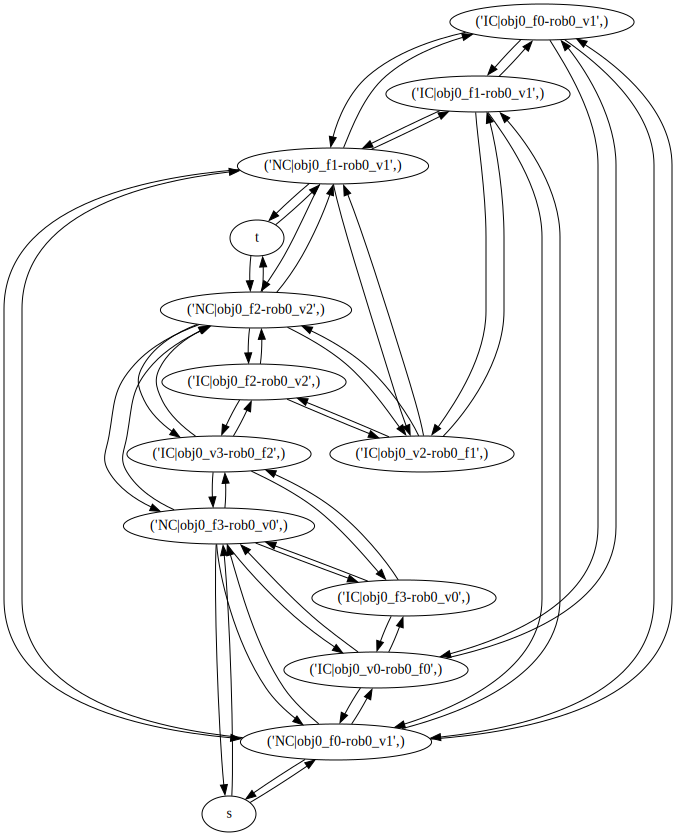

In [4]:
contact_graph.graphviz()

In [5]:
sol = contact_graph.solve(use_convex_relaxation=False)
vertex_names, ambient_path = zip(*sol.path)
print(vertex_names)

obj_force_res_trajectories: [[[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.29255786  0.29255786]
  [ 0.9760475   0.        ]
  [ 0.73139464 -0.29255786]
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]]]
rob_force_res_trajectories: [[[0.         0.        ]
  [0.63334412 0.7500523 ]
  [0.63332543 0.74996317]
  [0.29255786 0.29255786]
  [0.9760475  1.        ]
  [0.93139464 0.20744214]
  [1.30000001 0.60871051]
  [0.23333043 0.39127402]
  [0.         0.        ]]]
('s', "('NC|obj0_f0-rob0_v1',)", "('NC|obj0_f3-rob0_v0',)", "('IC|obj0_v0-rob0_f0',)", "('IC|obj0_f3-rob0_v0',)", "('IC|obj0_v3-rob0_f2',)", "('NC|obj0_f2-rob0_v2',)", "('NC|obj0_f1-rob0_v1',)", 't')


In [6]:
contact_sol = contact_graph.contact_spp_sol

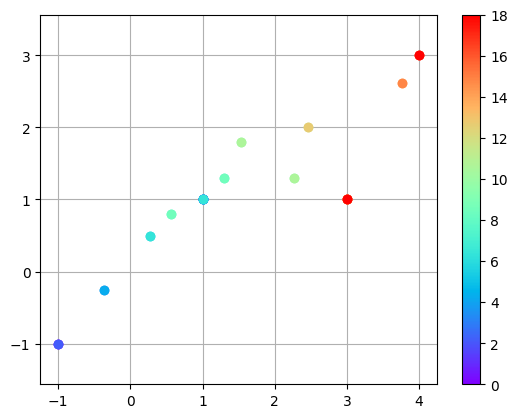

In [7]:
contact_graph.plot_path()

/Users/chewchiashaoyuan/Documents/Software/large_gcs/.venv/lib/python3.11/site-packages/matplotlib/quiver.py:630: RuntimeWarning: Mean of empty slice.
  amean = a.mean()


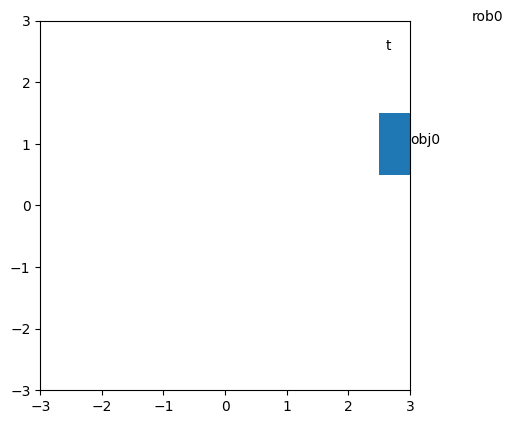

In [8]:
from IPython.display import HTML

anim = contact_graph.animate_solution()
HTML(anim.to_html5_video())

In [9]:
vertex_names, ambient_path = zip(*sol.path)
ambient_path = np.array(ambient_path)
contact_graph.cc_factory.uv_vars_all
for i in range(ambient_path.shape[0] - 1):
    for constraint in contact_graph._default_costs_constraints.edge_constraints:
        uv_vals_flattened = np.concatenate(ambient_path[i : i + 2])
        issatisfied = constraint.CheckSatisfied(uv_vals_flattened)
        print(f"constraint is satisfied: {issatisfied}")
    # print(f"vertex: {vertex_names[i]}")
    # print(f"vertex pos: {ambient_path[i]}")
    # print(f"next vertex: {vertex_names[i+1]}")
    # print(f"next vertex pos: {ambient_path[i+1]}")
    print("-------------------")

constraint is satisfied: True
-------------------
constraint is satisfied: True
-------------------
constraint is satisfied: True
-------------------
constraint is satisfied: True
-------------------
constraint is satisfied: True
-------------------
constraint is satisfied: True
-------------------
constraint is satisfied: True
-------------------
constraint is satisfied: True
-------------------
